In [8]:
import numpy as np
import matplotlib.pyplot as plt
import glob
%matplotlib inline

In [22]:
UNKNOWN_FLOW_THRESH = 1e7

def read_flow(filename):
    """ Read .flo file in Middlebury format"""
    # Code adapted from:
    # http://stackoverflow.com/questions/28013200/reading-middlebury-flow-files-with-python-bytes-array-numpy

    # WARNING: this will work on little-endian architectures (eg Intel x86) only!
    # print 'fn = %s'%(fn)
    with open(filename, 'rb') as f:
        magic = np.fromfile(f, np.float32, count=1)
        if 202021.25 != magic:
            print('Magic number incorrect. Invalid .flo file')
            return None
        else:
            w = np.fromfile(f, np.int32, count=1)
            h = np.fromfile(f, np.int32, count=1)
            print('Reading %d x %d flo file\n' % (w, h))
            data = np.fromfile(f, np.float32, count=2*int(w)*int(h))
            # Reshape data into 3D array (columns, rows, bands)
            # The reshape here is for visualization, the original code is (w,h,2)
            data = np.resize(data, (int(h), int(w), 2))
#             data = np.swapaxes(data,0,1)
            return data
            
def show_flow(filename):
    """
    visualize optical flow map using matplotlib
    :param filename: optical flow file
    :return: None
    """
    flow = read_flow(filename)
    img = flow_to_image(flow)
    plt.imshow(img)
    plt.show()
    
def flow_to_image(flow):
    """
    Convert flow into middlebury color code image
    :param flow: optical flow map
    :return: optical flow image in middlebury color
    """
    u = flow[:, :, 0]
    v = flow[:, :, 1]

    maxu = -999.
    maxv = -999.
    minu = 999.
    minv = 999.

    idxUnknow = (abs(u) > UNKNOWN_FLOW_THRESH) | (abs(v) > UNKNOWN_FLOW_THRESH)
    u[idxUnknow] = 0
    v[idxUnknow] = 0

    maxu = max(maxu, np.max(u))
    minu = min(minu, np.min(u))

    maxv = max(maxv, np.max(v))
    minv = min(minv, np.min(v))

    rad = np.sqrt(u ** 2 + v ** 2)
    maxrad = max(-1, np.max(rad))

#     print "max flow: %.4f\nflow range:\nu = %.3f .. %.3f\nv = %.3f .. %.3f" % (maxrad, minu,maxu, minv, maxv)

    u = u/(maxrad + np.finfo(float).eps)
    v = v/(maxrad + np.finfo(float).eps)

    img = compute_color(u, v)

    idx = np.repeat(idxUnknow[:, :, np.newaxis], 3, axis=2)
    img[idx] = 0

    return np.uint8(img)

def compute_color(u, v):
    """
    compute optical flow color map
    :param u: optical flow horizontal map
    :param v: optical flow vertical map
    :return: optical flow in color code
    """
    [h, w] = u.shape
    img = np.zeros([h, w, 3])
    nanIdx = np.isnan(u) | np.isnan(v)
    u[nanIdx] = 0
    v[nanIdx] = 0

    colorwheel = make_color_wheel()
    ncols = np.size(colorwheel, 0)

    rad = np.sqrt(u**2+v**2)

    a = np.arctan2(-v, -u) / np.pi

    fk = (a+1) / 2 * (ncols - 1) + 1

    k0 = np.floor(fk).astype(int)

    k1 = k0 + 1
    k1[k1 == ncols+1] = 1
    f = fk - k0

    for i in range(0, np.size(colorwheel,1)):
        tmp = colorwheel[:, i]
        col0 = tmp[k0-1] / 255
        col1 = tmp[k1-1] / 255
        col = (1-f) * col0 + f * col1

        idx = rad <= 1
        col[idx] = 1-rad[idx]*(1-col[idx])
        notidx = np.logical_not(idx)

        col[notidx] *= 0.75
        img[:, :, i] = np.uint8(np.floor(255 * col*(1-nanIdx)))

    return img


def make_color_wheel():
    """
    Generate color wheel according Middlebury color code
    :return: Color wheel
    """
    RY = 15
    YG = 6
    GC = 4
    CB = 11
    BM = 13
    MR = 6

    ncols = RY + YG + GC + CB + BM + MR

    colorwheel = np.zeros([ncols, 3])

    col = 0

    # RY
    colorwheel[0:RY, 0] = 255
    colorwheel[0:RY, 1] = np.transpose(np.floor(255*np.arange(0, RY) / RY))
    col += RY

    # YG
    colorwheel[col:col+YG, 0] = 255 - np.transpose(np.floor(255*np.arange(0, YG) / YG))
    colorwheel[col:col+YG, 1] = 255
    col += YG

    # GC
    colorwheel[col:col+GC, 1] = 255
    colorwheel[col:col+GC, 2] = np.transpose(np.floor(255*np.arange(0, GC) / GC))
    col += GC

    # CB
    colorwheel[col:col+CB, 1] = 255 - np.transpose(np.floor(255*np.arange(0, CB) / CB))
    colorwheel[col:col+CB, 2] = 255
    col += CB

    # BM
    colorwheel[col:col+BM, 2] = 255
    colorwheel[col:col+BM, 0] = np.transpose(np.floor(255*np.arange(0, BM) / BM))
    col += + BM

    # MR
    colorwheel[col:col+MR, 2] = 255 - np.transpose(np.floor(255 * np.arange(0, MR) / MR))
    colorwheel[col:col+MR, 0] = 255

    return colorwheel


Reading 320 x 192 flo file

Reading 320 x 192 flo file



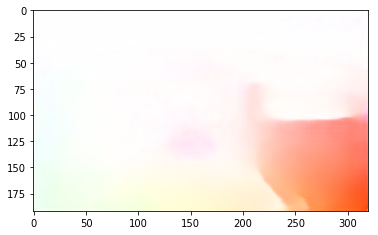

Reading 320 x 192 flo file

Reading 320 x 192 flo file



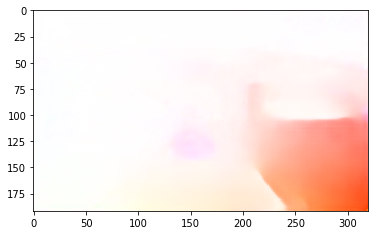

Reading 320 x 192 flo file

Reading 320 x 192 flo file



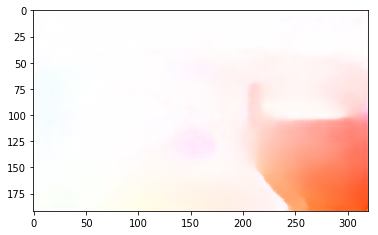

Reading 320 x 192 flo file

Reading 320 x 192 flo file



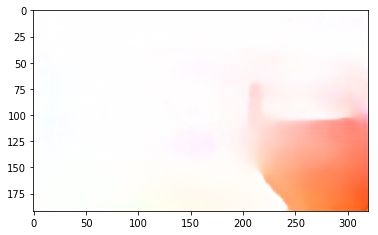

Reading 320 x 192 flo file

Reading 320 x 192 flo file



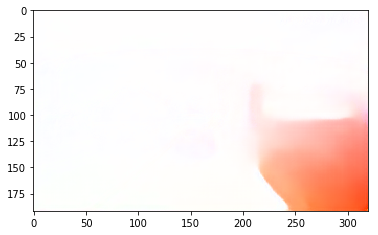

Reading 320 x 192 flo file

Reading 320 x 192 flo file



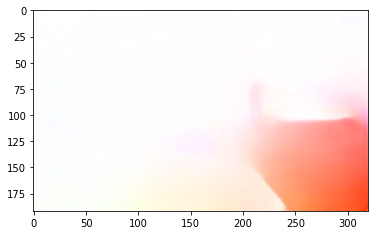

Reading 320 x 192 flo file

Reading 320 x 192 flo file



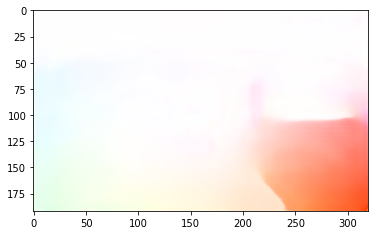

Reading 320 x 192 flo file

Reading 320 x 192 flo file



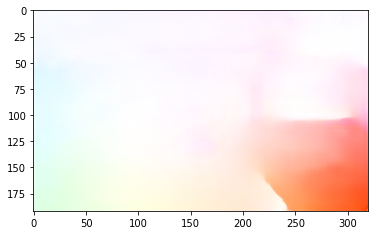

Reading 320 x 192 flo file

Reading 320 x 192 flo file



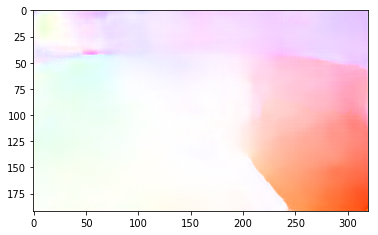

Reading 320 x 192 flo file

Reading 320 x 192 flo file



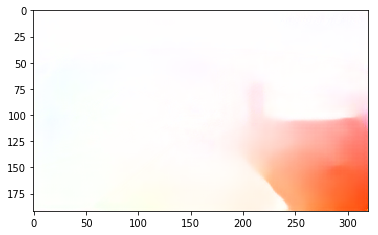

Reading 320 x 192 flo file

Reading 320 x 192 flo file



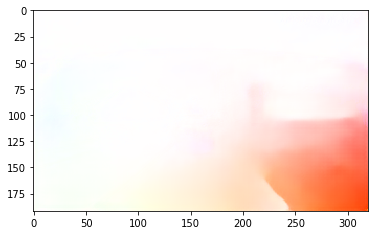

Reading 320 x 192 flo file

Reading 320 x 192 flo file



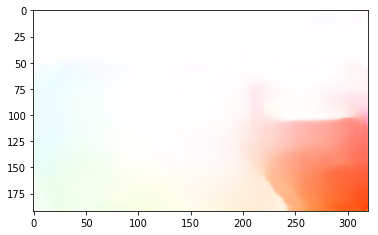

Reading 320 x 192 flo file

Reading 320 x 192 flo file



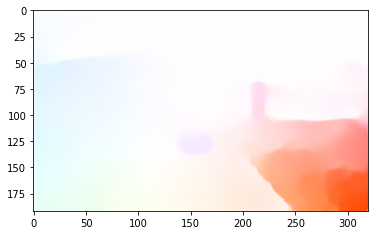

Reading 320 x 192 flo file

Reading 320 x 192 flo file



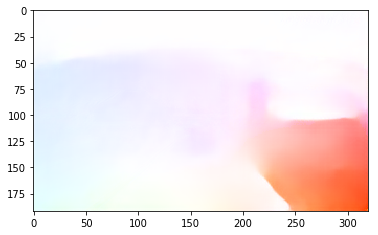

Reading 320 x 192 flo file

Reading 320 x 192 flo file



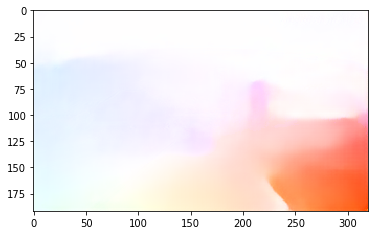

Reading 320 x 192 flo file

Reading 320 x 192 flo file



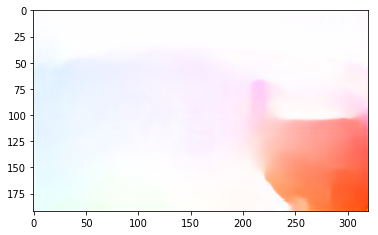

Reading 320 x 192 flo file

Reading 320 x 192 flo file



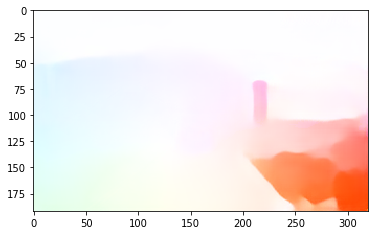

Reading 320 x 192 flo file

Reading 320 x 192 flo file



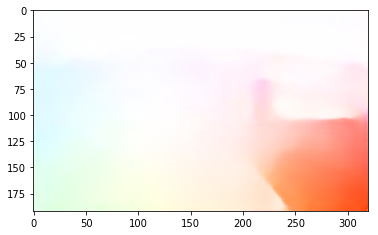

Reading 320 x 192 flo file

Reading 320 x 192 flo file



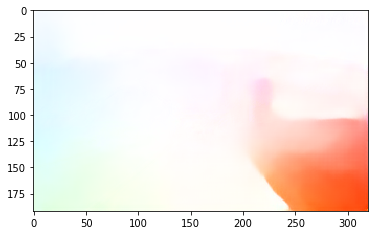

Reading 320 x 192 flo file

Reading 320 x 192 flo file



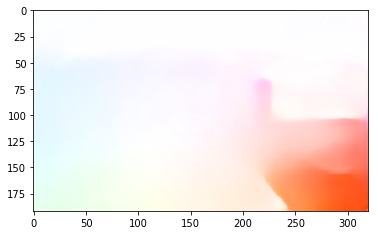

Reading 320 x 192 flo file

Reading 320 x 192 flo file



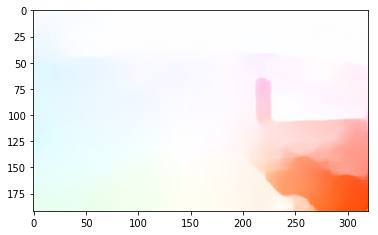

Reading 320 x 192 flo file

Reading 320 x 192 flo file



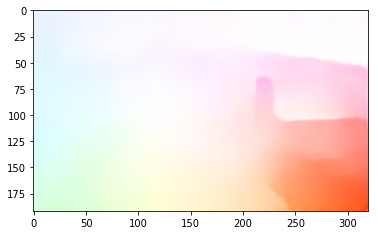

Reading 320 x 192 flo file

Reading 320 x 192 flo file



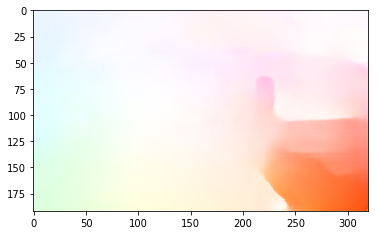

Reading 320 x 192 flo file

Reading 320 x 192 flo file



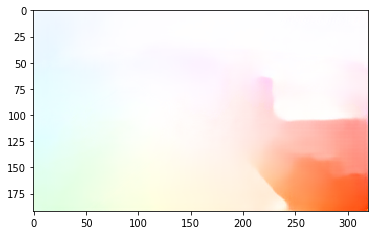

Reading 320 x 192 flo file

Reading 320 x 192 flo file



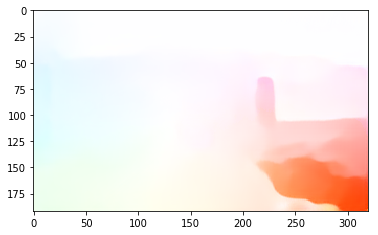

Reading 320 x 192 flo file

Reading 320 x 192 flo file



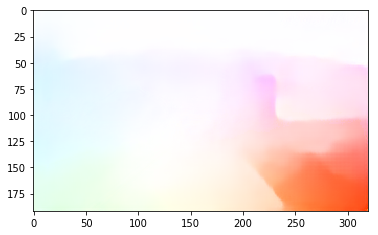

Reading 320 x 192 flo file

Reading 320 x 192 flo file



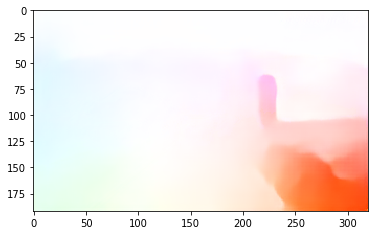

Reading 320 x 192 flo file

Reading 320 x 192 flo file



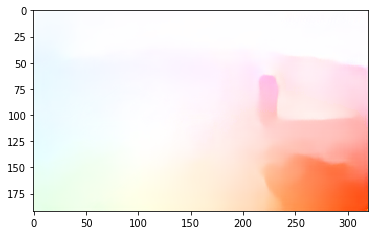

Reading 320 x 192 flo file

Reading 320 x 192 flo file



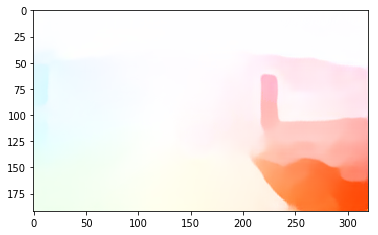

Reading 320 x 192 flo file

Reading 320 x 192 flo file



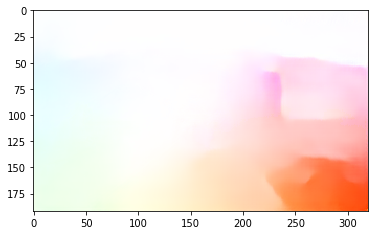

Reading 320 x 192 flo file

Reading 320 x 192 flo file



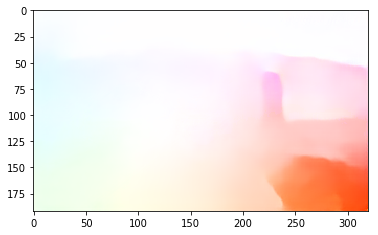

Reading 320 x 192 flo file

Reading 320 x 192 flo file



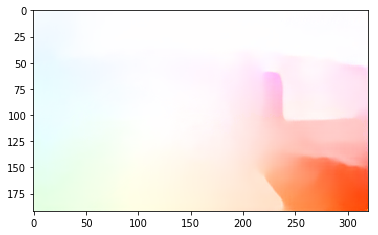

Reading 320 x 192 flo file

Reading 320 x 192 flo file



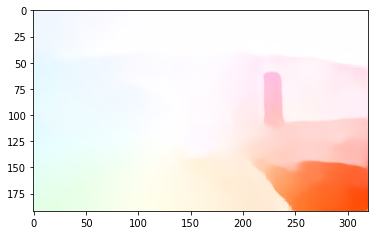

Reading 320 x 192 flo file

Reading 320 x 192 flo file



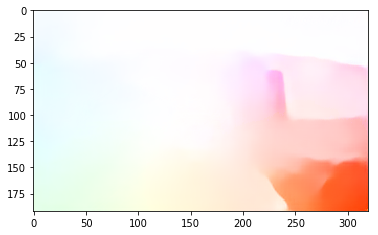

Reading 320 x 192 flo file

Reading 320 x 192 flo file



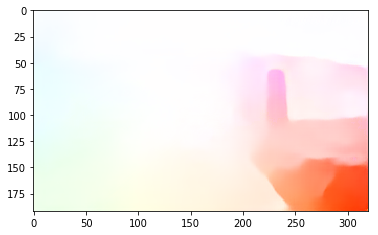

Reading 320 x 192 flo file

Reading 320 x 192 flo file



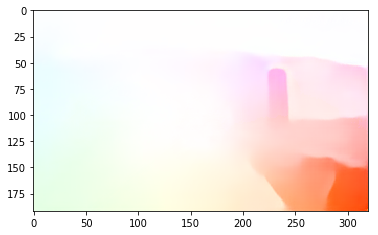

Reading 320 x 192 flo file

Reading 320 x 192 flo file



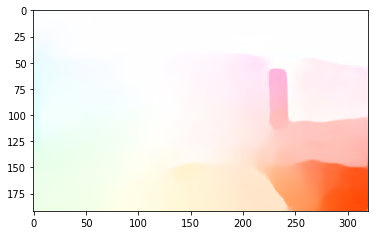

Reading 320 x 192 flo file

Reading 320 x 192 flo file



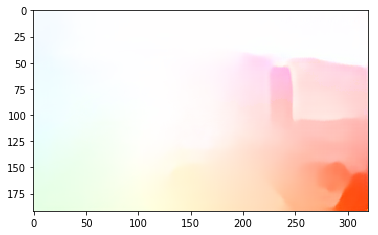

Reading 320 x 192 flo file

Reading 320 x 192 flo file



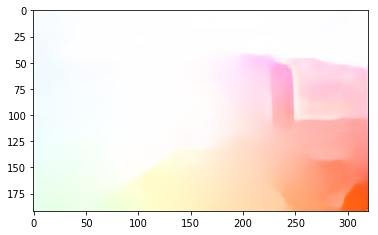

Reading 320 x 192 flo file

Reading 320 x 192 flo file



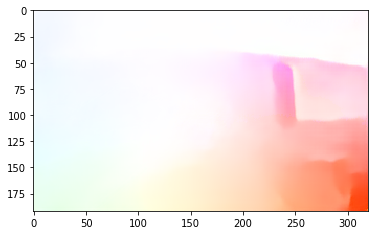

Reading 320 x 192 flo file

Reading 320 x 192 flo file



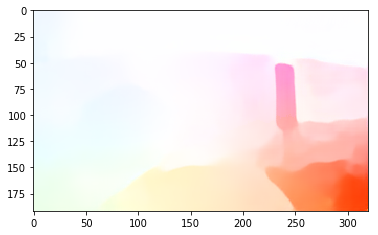

Reading 320 x 192 flo file

Reading 320 x 192 flo file



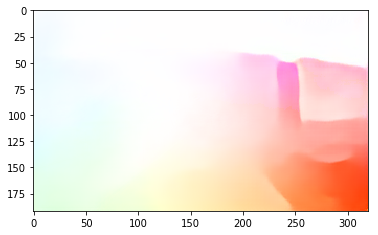

Reading 320 x 192 flo file

Reading 320 x 192 flo file



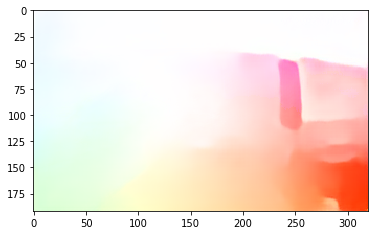

Reading 320 x 192 flo file

Reading 320 x 192 flo file



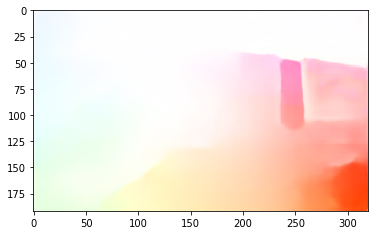

Reading 320 x 192 flo file

Reading 320 x 192 flo file



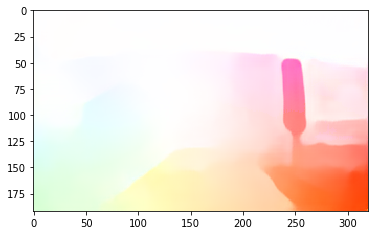

Reading 320 x 192 flo file

Reading 320 x 192 flo file



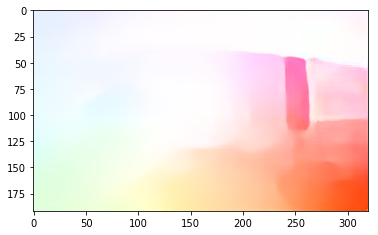

Reading 320 x 192 flo file

Reading 320 x 192 flo file



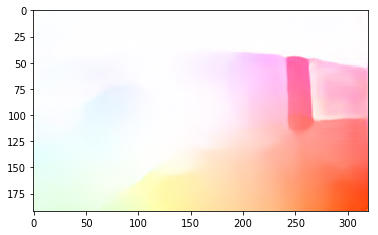

Reading 320 x 192 flo file

Reading 320 x 192 flo file



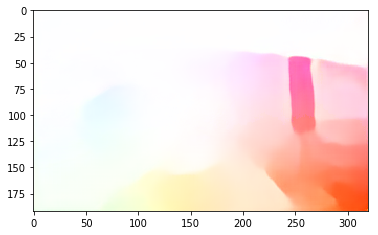

Reading 320 x 192 flo file

Reading 320 x 192 flo file



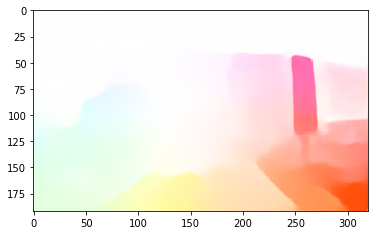

Reading 320 x 192 flo file

Reading 320 x 192 flo file



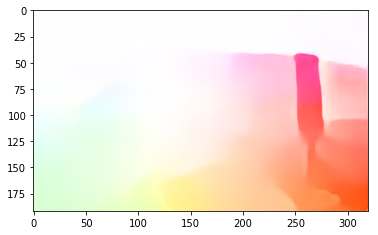

Reading 320 x 192 flo file

Reading 320 x 192 flo file



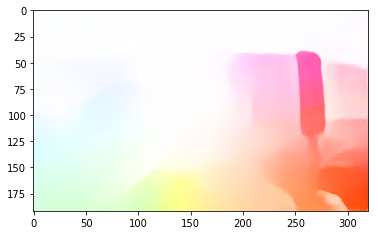

Reading 320 x 192 flo file

Reading 320 x 192 flo file



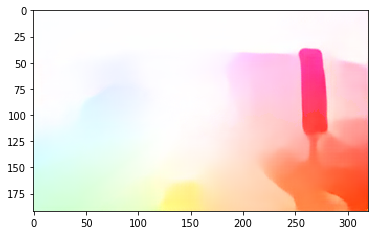

Reading 320 x 192 flo file

Reading 320 x 192 flo file



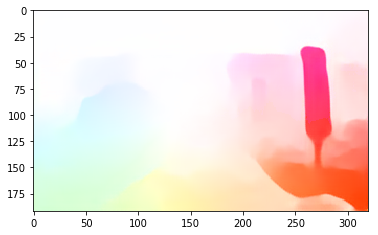

Reading 320 x 192 flo file

Reading 320 x 192 flo file



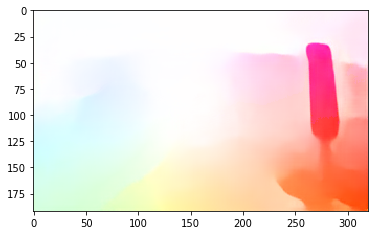

Reading 320 x 192 flo file

Reading 320 x 192 flo file



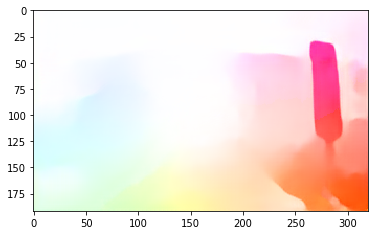

Reading 320 x 192 flo file

Reading 320 x 192 flo file



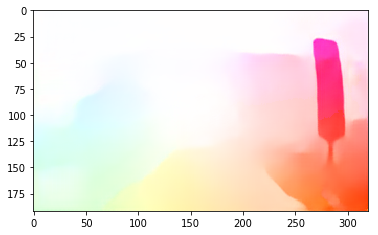

Reading 320 x 192 flo file

Reading 320 x 192 flo file



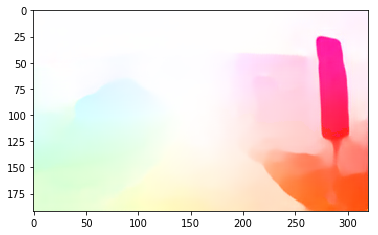

Reading 320 x 192 flo file

Reading 320 x 192 flo file



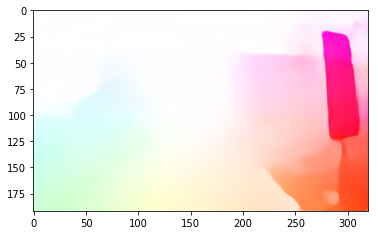

Reading 320 x 192 flo file

Reading 320 x 192 flo file



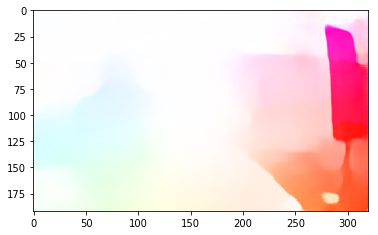

Reading 320 x 192 flo file

Reading 320 x 192 flo file



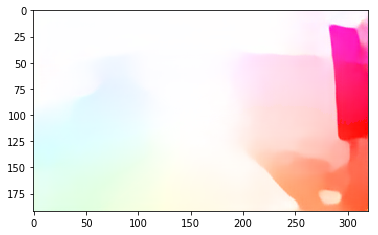

Reading 320 x 192 flo file

Reading 320 x 192 flo file



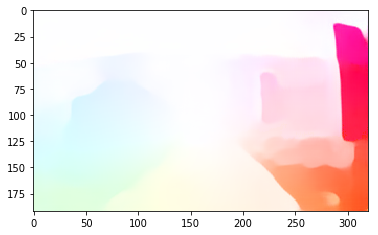

Reading 320 x 192 flo file

Reading 320 x 192 flo file



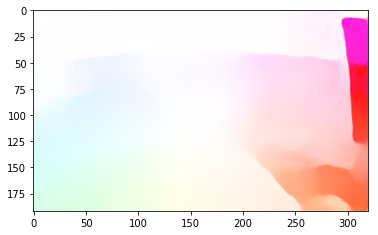

Reading 320 x 192 flo file

Reading 320 x 192 flo file



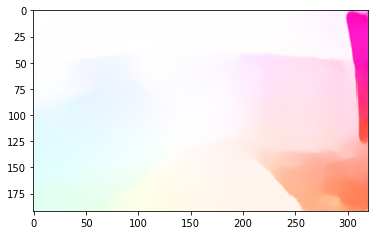

Reading 320 x 192 flo file

Reading 320 x 192 flo file



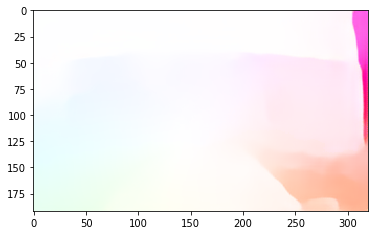

Reading 320 x 192 flo file

Reading 320 x 192 flo file



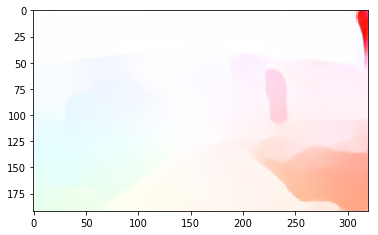

Reading 320 x 192 flo file

Reading 320 x 192 flo file



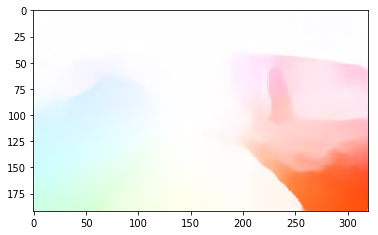

Reading 320 x 192 flo file

Reading 320 x 192 flo file



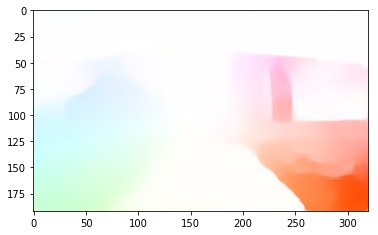

Reading 320 x 192 flo file

Reading 320 x 192 flo file



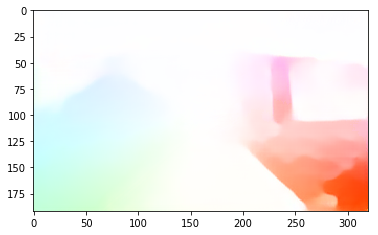

Reading 320 x 192 flo file

Reading 320 x 192 flo file



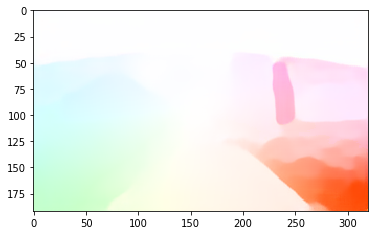

Reading 320 x 192 flo file

Reading 320 x 192 flo file



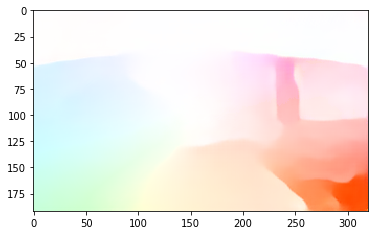

Reading 320 x 192 flo file

Reading 320 x 192 flo file



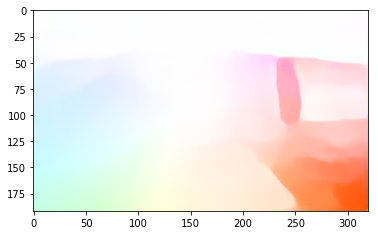

Reading 320 x 192 flo file

Reading 320 x 192 flo file



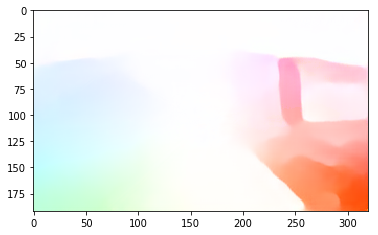

Reading 320 x 192 flo file

Reading 320 x 192 flo file



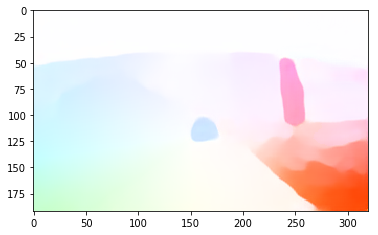

Reading 320 x 192 flo file

Reading 320 x 192 flo file



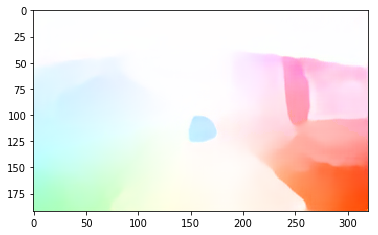

Reading 320 x 192 flo file

Reading 320 x 192 flo file



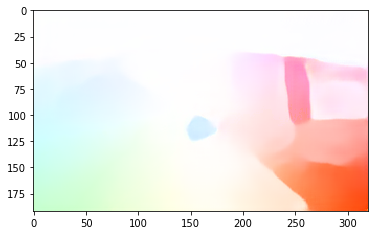

Reading 320 x 192 flo file

Reading 320 x 192 flo file



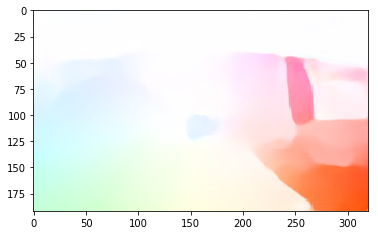

Reading 320 x 192 flo file

Reading 320 x 192 flo file



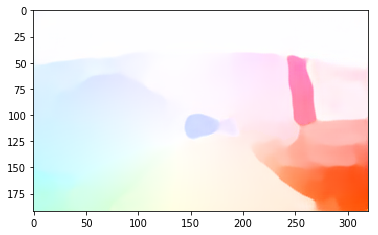

Reading 320 x 192 flo file

Reading 320 x 192 flo file



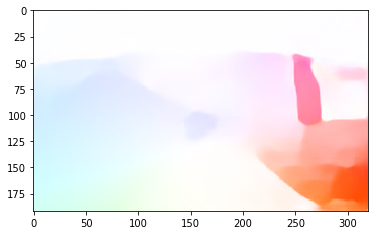

Reading 320 x 192 flo file

Reading 320 x 192 flo file



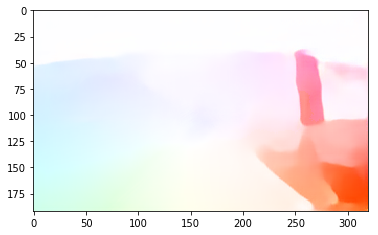

Reading 320 x 192 flo file

Reading 320 x 192 flo file



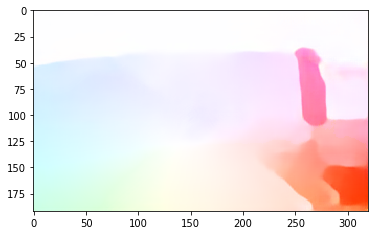

Reading 320 x 192 flo file

Reading 320 x 192 flo file



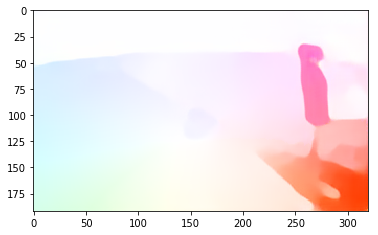

Reading 320 x 192 flo file

Reading 320 x 192 flo file



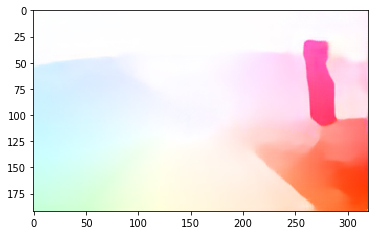

Reading 320 x 192 flo file

Reading 320 x 192 flo file



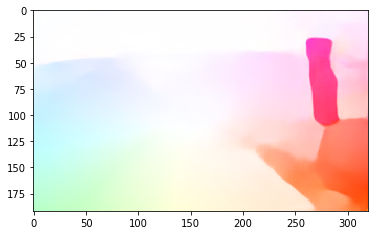

Reading 320 x 192 flo file

Reading 320 x 192 flo file



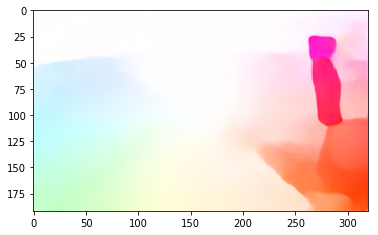

Reading 320 x 192 flo file

Reading 320 x 192 flo file



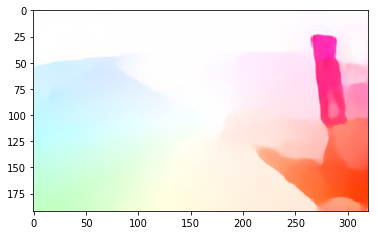

Reading 320 x 192 flo file

Reading 320 x 192 flo file



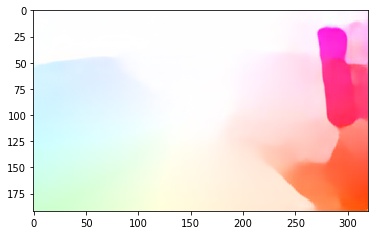

Reading 320 x 192 flo file

Reading 320 x 192 flo file



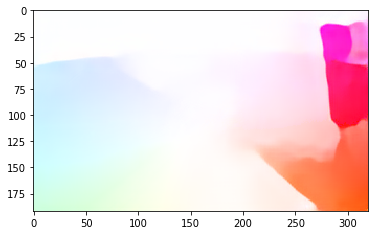

Reading 320 x 192 flo file

Reading 320 x 192 flo file



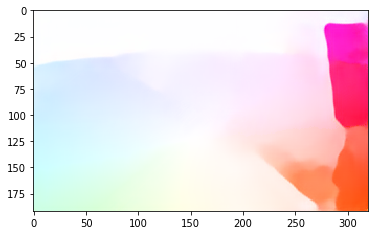

Reading 320 x 192 flo file

Reading 320 x 192 flo file



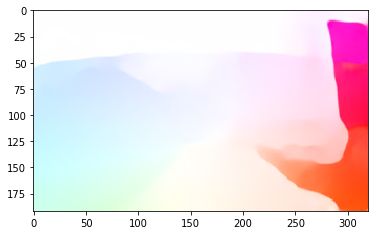

Reading 320 x 192 flo file

Reading 320 x 192 flo file



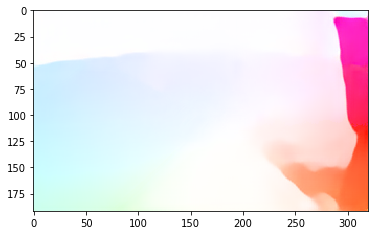

Reading 320 x 192 flo file

Reading 320 x 192 flo file



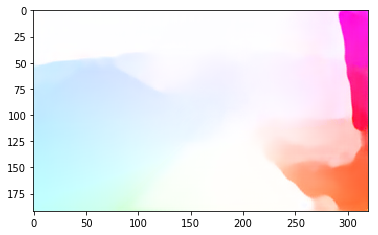

Reading 320 x 192 flo file

Reading 320 x 192 flo file



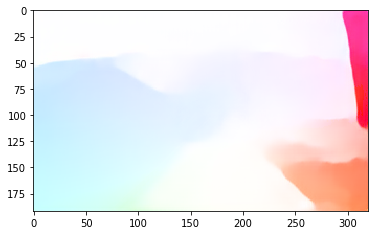

Reading 320 x 192 flo file

Reading 320 x 192 flo file



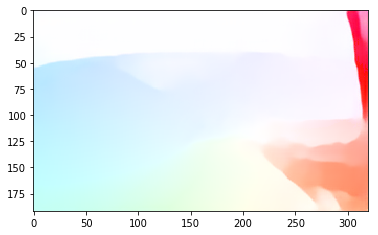

Reading 320 x 192 flo file

Reading 320 x 192 flo file



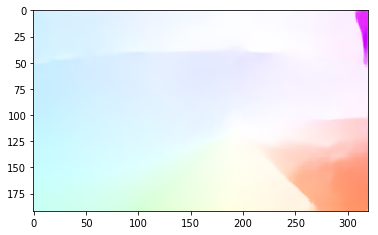

Reading 320 x 192 flo file

Reading 320 x 192 flo file



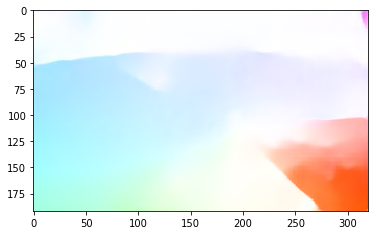

Reading 320 x 192 flo file

Reading 320 x 192 flo file



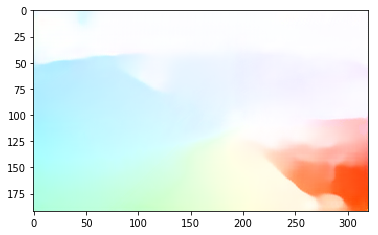

Reading 320 x 192 flo file

Reading 320 x 192 flo file



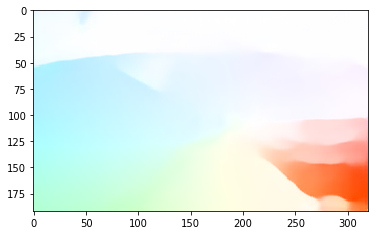

Reading 320 x 192 flo file

Reading 320 x 192 flo file



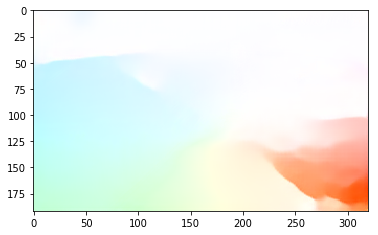

Reading 320 x 192 flo file

Reading 320 x 192 flo file



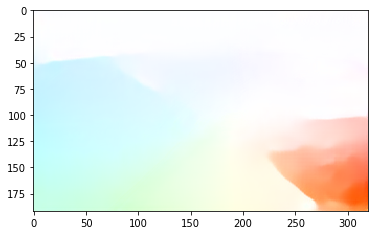

In [25]:
all_files = sorted(glob.glob('000456/*.flo'))
for i, file in enumerate(all_files):
    flow = read_flow(file)
    show_flow(file)
    if i > 100:
        break

In [13]:
import numpy as np
from os.path import *
import scipy.misc
import imageio

In [6]:
def read_gen(file_name):
    ext = splitext(file_name)[-1]
    if ext == '.png' or ext == '.jpeg' or ext == '.ppm' or ext == '.jpg':
        im = imageio.imread(file_name)
        if im.shape[2] > 3:
            return im[:,:,:3]
        else:
            return im
    elif ext == '.bin' or ext == '.raw':
        return np.load(file_name)
    elif ext == '.flo':
        return flow_utils.readFlow(file_name).astype(np.float32)
    return []

In [7]:
image_name = '/Users/brianyao/Documents/stad2019iccv/try/000456/0000.jpg'
img1 = read_gen(image_name)
print(img1.shape)

(1152, 1152, 3)


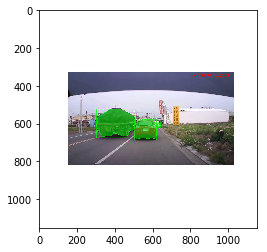

In [9]:
plt.imshow(img1)

In [18]:
img1 = scipy.misc.imresize(img1, size=(192, 320))

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  """Entry point for launching an IPython kernel.


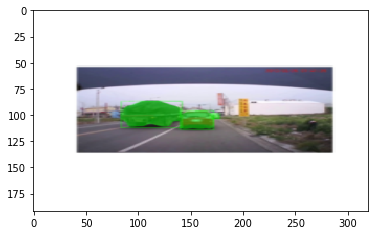

In [19]:
plt.imshow(img1)

In [20]:
images = [img1, img1]
images = np.array(images).transpose(3,0,1,2)
print(images.shape)

(3, 2, 192, 320)
